In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt  # for plots
import numpy as np  # for working with numbers and arrays of numbers

In [3]:
class exampleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  # first convolutional layer
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5) # second convolutional layer
        self.fc1 = nn.Linear(20*4*4, 10) # fully connected layer

    def forward(self, x):
        print("Original input size:\t {}".format(x.shape))
        x = self.conv1(x)
        print("Size after conv1:\t {}".format(x.shape))
        x = F.max_pool2d(x, 2)
        print("Size after max pool 1:\t {}".format(x.shape))
        x = F.relu(x)
        x = self.conv2(x)
        print("Size after conv2:\t {}".format(x.shape))
        x = F.max_pool2d(x, 2)
        print("Size after max pool 2:\t {}".format(x.shape))
        x = F.relu(x)
        x = x.view(-1, 16*20)
        print("Size before fc1:\t {}".format(x.shape))
        x = self.fc1(x)
        print("Size after fc1:\t\t {}".format(x.shape))
        return F.log_softmax(x, dim=1)   

# this function is here to show an image
def imshow(img, title=None):
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.show
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated 

In [4]:
model = exampleCNN()
model.load_state_dict(torch.load("./cnn_model1.model",map_location=torch.device('cpu')))
model.eval()

exampleCNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=10, bias=True)
)

In [5]:
mnist_dataset=datasets.MNIST("./datasets/MNIST",download=True)


100.0%


Extracting ./datasets/MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./datasets/MNIST\MNIST\raw



100.0%

Extracting ./datasets/MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./datasets/MNIST\MNIST\raw




2.0%

100.0%


Extracting ./datasets/MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./datasets/MNIST\MNIST\raw



100.0%

Extracting ./datasets/MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./datasets/MNIST\MNIST\raw



Original input size:	 torch.Size([1, 28, 28])
Size after conv1:	 torch.Size([10, 24, 24])
Size after max pool 1:	 torch.Size([10, 12, 12])
Size after conv2:	 torch.Size([20, 8, 8])
Size after max pool 2:	 torch.Size([20, 4, 4])
Size before fc1:	 torch.Size([1, 320])
Size after fc1:		 torch.Size([1, 10])
tensor([[-5401.4023, -5202.8330, -3758.1899,     0.0000, -5169.7007, -2966.3145,
         -7003.3633, -4563.1670, -3260.1914, -2088.3525]],
       grad_fn=<LogSoftmaxBackward0>)


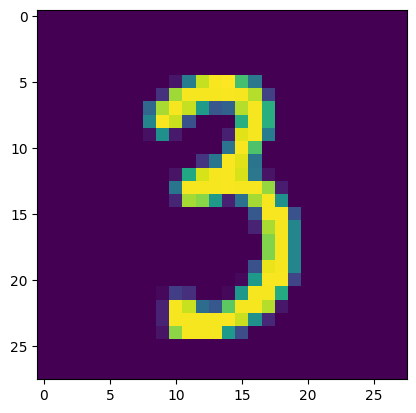

3

In [7]:
i=98
t1=((mnist_dataset.data[i]-0.1307)/0.3081).view(1,28,28)
output=model(t1)
print(output)
new, predicted = torch.max(output.data, 1)
imshow(mnist_dataset.data[i])
predicted.to(torch.device("cpu")).item()